<a href="https://colab.research.google.com/github/leeh8911/ML-From-Scratch/blob/master/day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 3.2.2 implementation step function
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
    
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [93]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0
print(y)

y = y.astype(np.int)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


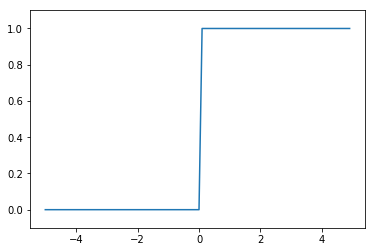

In [94]:
# 3.2.3 Graph of step function
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

In [95]:
# 3.2.4 Implementation of sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])

print(sigmoid(x))

t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0/t)

[0.26894142 0.73105858 0.88079708]
[2. 3. 4.]
[1.         0.5        0.33333333]


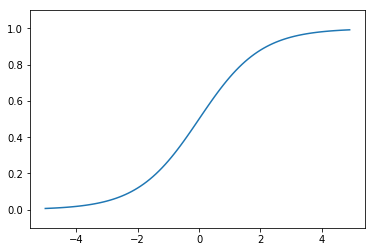

In [96]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [0]:
# 3.2.7 ReLU function
def relu(x):
    return np.maximum(0,x)

In [98]:
# 3.6 HandWrite number recognition
# connect google drive and colab
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

import sys, os
os.chdir("/content/gdrive/My Drive/github/deep-learning-from-scratch/ch03")
print(os.getcwd())
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# # 
(x_train, t_train), (x_test, t_test) = \
load_mnist(flatten = True, normalize = False)

#
print("x_train = ", x_train.shape)
print("t_train = ", t_train.shape)
print("x_test  = ", x_test.shape)
print("t_test  = ", t_test.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/github/deep-learning-from-scratch/ch03
x_train =  (60000, 784)
t_train =  (60000,)
x_test  =  (10000, 784)
t_test  =  (10000,)


5
(784,)
(28, 28)
img show!


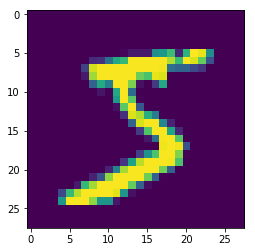

In [99]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from matplotlib.pyplot import imshow # in colab, cannot create new window! ... maybe
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    imshow(img)
    print("img show!")
    
(x_train, t_train), (x_test, t_test) = \
load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)
img = img.reshape(28,28)
print(img.shape)
img_show(img)



In [0]:
def softmax(a):
    c = np.max(a)
    exp_a  = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

def predict_vis(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    z1_v = z1.reshape(10,5)
    z2_v = z2.reshape(10,10)
    plt.subplot(1,3,1)
    imshow(x.reshape(28,28))
    plt.subplot(1,3,2)
    imshow(z1_v)
    plt.subplot(1,3,3)
    imshow(z2_v)
    return y




In [101]:
import pickle

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        

print("Accuracy : " + str(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352


4 = 4  ?  True


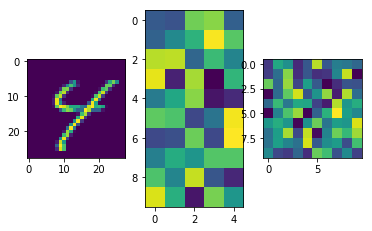

In [128]:
data_index = np.random.randint(0, len(x));
tmp_x = x[data_index]
y = predict_vis(network, tmp_x)
print(y.argmax(), "=", t[data_index], " ? ", y.argmax() == t[data_index])

In [109]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print("x    : ", x.shape)
print("x[0] : ", x[0].shape)
print("W1   : ", W1.shape)
print("W2   : ", W2.shape)
print("W3   : ", W3.shape)

x    :  (10000, 784)
x[0] :  (784,)
W1   :  (784, 50)
W2   :  (50, 100)
W3   :  (100, 10)


In [131]:
x,t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy : " + str(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352
